In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%time df = pd.read_csv('US_Accidents_June.csv')

CPU times: user 15.5 s, sys: 3.22 s, total: 18.7 s
Wall time: 20.5 s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
(df.isnull().sum()/df.shape[0])*100

ID                        0.000000
Source                    0.000000
TMC                      29.451104
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  70.548896
End_Lng                  70.548896
Distance(mi)              0.000000
Description               0.000028
Number                   64.402694
Street                    0.000000
Side                      0.000000
City                      0.003188
County                    0.000000
State                     0.000000
Zipcode                   0.030424
Country                   0.000000
Timezone                  0.110428
Airport_Code              0.192337
Weather_Timestamp         1.233003
Temperature(F)            1.870779
Wind_Chill(F)            53.171675
Humidity(%)               1.983341
Pressure(in)              1.590441
Visibility(mi)            2.158915
Wind_Direction      

In [7]:
#TMC, End_Lat , End_Lng, Number, Wind_Chill, Wind_Speed, Precipitation have more missing values

In [8]:
df['TMC'].value_counts()

201.0    2080341
241.0     249852
245.0      40338
229.0      22932
203.0      17639
222.0      13154
244.0      12185
406.0      11109
246.0       7118
343.0       6930
202.0       6298
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        920
341.0        592
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [9]:
#sns.heatmap(df.isnull(),cbar = False, cmap = 'inferno')

In [10]:
import datetime as dt

In [11]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df['day_of_week'] = df['Weather_Timestamp'].dt.dayofweek 

In [14]:
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

<AxesSubplot:xlabel='Severity', ylabel='count'>

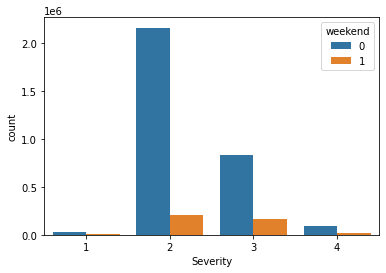

In [15]:
sns.countplot(x='Severity',hue='weekend',data = df)

<AxesSubplot:xlabel='Severity', ylabel='count'>

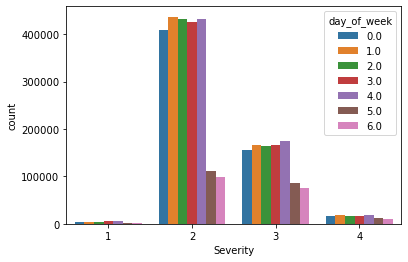

In [16]:
sns.countplot(x='Severity',hue='day_of_week',data=df)

In [17]:
df['Time'] = df['Weather_Timestamp'].dt.hour.apply(lambda x: 1 if x>18 or x<7 else 0)

<AxesSubplot:xlabel='Severity', ylabel='count'>

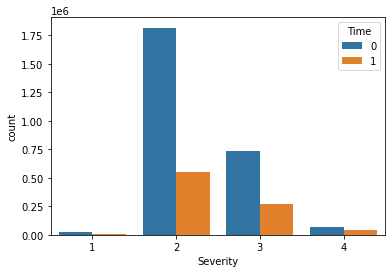

In [18]:
sns.countplot(x='Severity',hue='Time',data = df)

In [19]:
df = df.iloc[df[['TMC']].dropna().index]

In [20]:
(df.isnull().sum()/df.shape[0])*100

ID                         0.000000
Source                     0.000000
TMC                        0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Start_Lat                  0.000000
Start_Lng                  0.000000
End_Lat                  100.000000
End_Lng                  100.000000
Distance(mi)               0.000000
Description                0.000040
Number                    60.336378
Street                     0.000000
Side                       0.000000
City                       0.002057
County                     0.000000
State                      0.000000
Zipcode                    0.012506
Country                    0.000000
Timezone                   0.083144
Airport_Code               0.166975
Weather_Timestamp          1.120292
Temperature(F)             1.654942
Wind_Chill(F)             58.076793
Humidity(%)                1.763300
Pressure(in)               1.417853
Visibility(mi)             1

In [21]:
#sns.heatmap(df.isnull(),cmap = 'crest')

End_Lat, End_Lng, Number, Wind_Chill(F), Wind_Speed(mph), Precipitation(in), have more NaN values and it is difficult to interprate values for End_Lat, End_Lng, Number

In [22]:
df = df.drop(['End_Lat', 'End_Lng', 'Number'],axis = 1)

In [23]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format = '%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format = '%Y-%m-%d %H:%M:%S')

In [24]:
df['accident_time'] = df['End_Time'] - df['Start_Time']

In [25]:
accident_days = (df['accident_time'].dt.days.value_counts())

In [26]:
df.isnull().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          51
County                         0
State                          0
Zipcode                      310
Country                        0
Timezone                    2061
Airport_Code                4139
Weather_Timestamp          27770
Temperature(F)             41023
Wind_Chill(F)            1439618
Humidity(%)                43709
Pressure(in)               35146
Visibility(mi)             49005
Wind_Direction             35473
Wind_Speed(mph)           344193
Precipitation(in)        1544502
Weather_Condition          48959
Amenity                        0
Bump      

In [27]:
df = df.iloc[df[['Weather_Timestamp']].dropna().index]

In [28]:
(df.isnull().sum()/df.shape[0])*100

ID                        0.000000
Source                    0.000000
TMC                       0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description               0.000041
Street                    0.000000
Side                      0.000000
City                      0.002040
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.540707
Wind_Chill(F)            57.601810
Humidity(%)               0.650293
Pressure(in)              0.300932
Visibility(mi)            0.866364
Wind_Direction            0.314274
Wind_Speed(mph)          12.909702
Precipitation(in)        61.880959
Weather_Condition   

In [29]:
df['month'] = df['Weather_Timestamp'].dt.month

In [30]:
df['year'] = df['Weather_Timestamp'].dt.year

In [31]:
df['day'] = df['Weather_Timestamp'].dt.day

In [32]:
df[['Wind_Chill(F)']] = df[['Wind_Chill(F)']].interpolate()

In [33]:
df[['Temperature(F)']] = df[['Temperature(F)']].interpolate()

In [34]:
df.groupby('month').mean()[['Temperature(F)']]

,Temperature(F)
month,
1,43.936429
2,48.096902
3,53.266718
4,61.309840
5,69.572217
6,75.720241
7,80.091867
8,78.773867
9,74.680796


In [35]:
df.isna().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          50
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  2
Humidity(%)                15939
Pressure(in)                7376
Visibility(mi)             21235
Wind_Direction              7703
Wind_Speed(mph)           316423
Precipitation(in)        1516732
Weather_Condition          21189
Amenity                        0
Bump      

In [36]:
df[['Humidity(%)']] = df[['Humidity(%)']].interpolate()

In [37]:
df.groupby('month').mean()[['Humidity(%)']]

,Humidity(%)
month,
1,69.630671
2,70.283805
3,63.529419
4,61.871593
5,64.649479
6,63.105452
7,63.066155
8,66.060704
9,66.463726


In [38]:
(df.isna().sum()/df.shape[0])*100

ID                        0.000000
Source                    0.000000
TMC                       0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description               0.000041
Street                    0.000000
Side                      0.000000
City                      0.002040
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000082
Humidity(%)               0.000000
Pressure(in)              0.300932
Visibility(mi)            0.866364
Wind_Direction            0.314274
Wind_Speed(mph)          12.909702
Precipitation(in)        61.880959
Weather_Condition   

In [39]:
df.groupby('month').mean()[['Wind_Speed(mph)']]

,Wind_Speed(mph)
month,
1,8.575275
2,8.873334
3,9.338073
4,9.107780
5,8.416213
6,7.928185
7,7.548391
8,7.340925
9,7.555153


In [40]:
df[['Wind_Speed(mph)']] = df[['Wind_Speed(mph)']].interpolate()
#df[['Wind_Speed(mph)']] = df['Wind_Speed(mph)'].fillna(method = 'bfill')

In [41]:
df.groupby('month').mean()[['Wind_Speed(mph)']]

,Wind_Speed(mph)
month,
1,8.250224
2,8.556929
3,8.992067
4,8.899745
5,8.244503
6,7.778303
7,7.356962
8,7.130053
9,7.266796


In [42]:
df.groupby('day').mean()[['Pressure(in)']]

,Pressure(in)
day,
1,29.825534
2,29.811703
3,29.763339
4,29.796402
5,29.812763
6,29.809499
7,29.841588
8,29.843452
9,29.816385


In [43]:
df[['Pressure(in)']] = df[['Pressure(in)']].replace(np.nan,df['Pressure(in)'].mean())

In [44]:
df.groupby('day').mean()[['Pressure(in)']]

,Pressure(in)
day,
1,29.825487
2,29.811699
3,29.763460
4,29.796435
5,29.812756
6,29.809501
7,29.841508
8,29.843346
9,29.816368


In [45]:
df[['Visibility(mi)']]

,Visibility(mi)
0,10.0
1,10.0
2,10.0
3,9.0
4,6.0
...,...
2478813,10.0
2478814,10.0
2478815,6.0
2478816,10.0


In [46]:
df.isnull().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          50
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  2
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)             21235
Wind_Direction              7703
Wind_Speed(mph)                2
Precipitation(in)        1516732
Weather_Condition          21189
Amenity                        0
Bump      

In [47]:
df.isnull().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          50
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  2
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)             21235
Wind_Direction              7703
Wind_Speed(mph)                2
Precipitation(in)        1516732
Weather_Condition          21189
Amenity                        0
Bump      

In [48]:
df = df.loc[df[['Wind_Direction']].dropna().index]

In [49]:
df.isnull().sum()

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    1
Street                         0
Side                           0
City                          50
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  2
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)             18373
Wind_Direction                 0
Wind_Speed(mph)                2
Precipitation(in)        1516591
Weather_Condition          18515
Amenity                        0
Bump      

In [50]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [51]:
#sns.heatmap(df.isnull(),cmap = 'inferno', yticklabels = False)

In [52]:
df = df.loc[df[['Weather_Condition']].dropna().index]

In [53]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'day_of_week', 'weekend', 'Time',
       'accident_time', 'month', 'year', 'day'],
      dtype='object')

In [348]:
df1 = df.drop(['TMC','ID','Source','Start_Time','End_Time','Start_Lat', 'Start_Lng',\
        'Description', 'Street','Side', 'City', 'County', 'State', 'Zipcode',\
         'Country', 'Timezone','Astronomical_Twilight','Time','accident_time', \
         'month', 'year', 'day','Airport_Code','Weather_Timestamp',\
        'Civil_Twilight', 'Nautical_Twilight','day_of_week'],axis=1)

In [55]:
df1.isnull().sum()

TMC                        0
Severity                   0
Distance(mi)               0
Temperature(F)             0
Wind_Chill(F)              2
Humidity(%)                0
Pressure(in)               0
Visibility(mi)          5316
Wind_Direction             0
Wind_Speed(mph)            2
Precipitation(in)    1500129
Weather_Condition          0
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset            51
weekend                    0
dtype: int64

In [349]:
df0 = df1.dropna()

In [350]:
df01 = df0[df0.columns[df0.dtypes=='float64']]

In [351]:
df01.columns

Index(['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [352]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [353]:
scale = StandardScaler()
df01 = scale.fit_transform(df01)

In [354]:
knn = NearestNeighbors(n_neighbors=2)
neigbors = knn.fit(df01)

In [355]:
distances, indices = neigbors.kneighbors(df01)

In [356]:
distances = np.sort(distances,axis=0)

In [357]:
len(distances[:,1])

923190

In [358]:
distances[:,1][::-1][:10]

array([79.04970202, 41.3652786 , 20.93183878, 14.15449069, 11.06269748,
        8.7882724 ,  8.28727168,  7.05718778,  6.84999867,  6.21716332])

In [359]:
(distances[:,1]>1).sum()

1715

In [1]:
distances[distances[:,1]>1]

NameError: name 'distances' is not defined

In [361]:
distances.shape

(923190, 2)

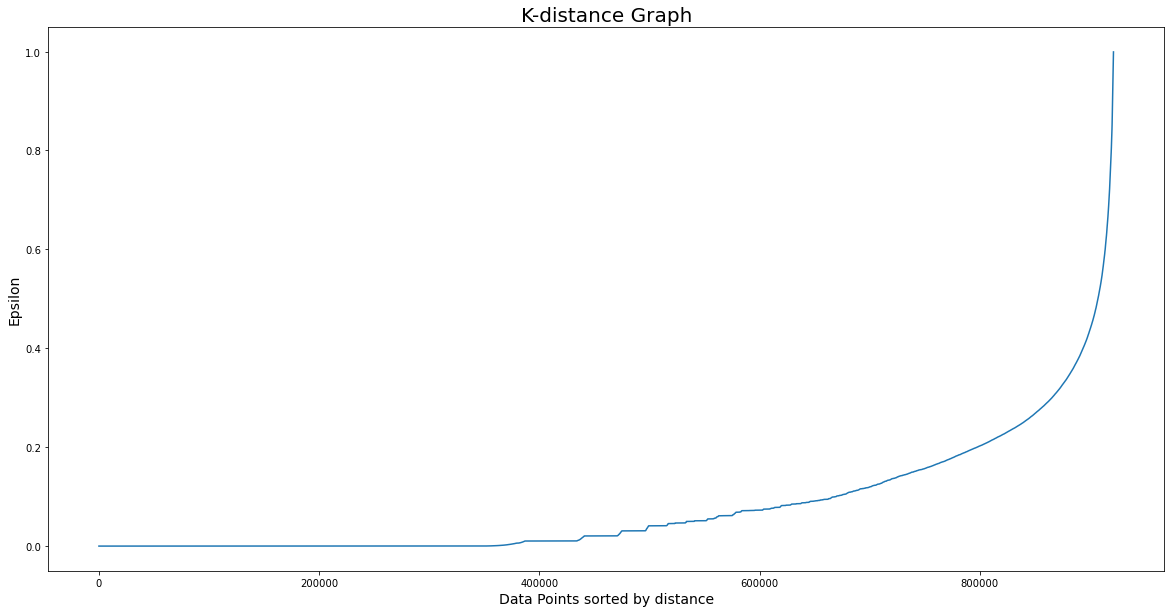

In [362]:
plt.figure(figsize=(20,10))
plt.plot(distances[distances[:,1]<1][:,1])
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [363]:
dbscan = DBSCAN(eps=0.3,min_samples=10)

In [364]:
dbscan.fit(df01)

DBSCAN(eps=0.3, min_samples=10)

In [365]:
sns.scatterplot(x=df01[:,1],y=df01[:,8])

IndexError: index 8 is out of bounds for axis 1 with size 8

In [ ]:
labels, counts = np.unique(dbscan.labels_,return_counts=True)

In [ ]:
df02 = np.concatenate([df01,dbscan.labels_.reshape(-1,1)],axis=1)

In [ ]:
df02 = df02[df02[:,9]!=-1][:,:9]

In [ ]:
sns.scatterplot(x=df02[:,2],y=df02[:,1])

In [305]:
from sklearn.decomposition import PCA

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424830 entries, 0 to 2478817
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           int64  
 2   Distance(mi)       float64
 3   Temperature(F)     float64
 4   Wind_Chill(F)      float64
 5   Humidity(%)        float64
 6   Pressure(in)       float64
 7   Visibility(mi)     float64
 8   Wind_Direction     object 
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Weather_Condition  object 
 12  Amenity            bool   
 13  Bump               bool   
 14  Crossing           bool   
 15  Give_Way           bool   
 16  Junction           bool   
 17  No_Exit            bool   
 18  Railway            bool   
 19  Roundabout         bool   
 20  Station            bool   
 21  Stop               bool   
 22  Traffic_Calming    bool   
 23  Traffic_Signal     bool   
 24  Turning_Loop       bool   
 25  Sunrise_Sunset    

In [55]:
df = df.drop(['ID','Source','Description','Street','City','County','Airport_Code','Precipitation(in)','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)

In [56]:
df.isnull().sum()

TMC                     0
Severity                0
Start_Time              0
End_Time                0
Start_Lat               0
Start_Lng               0
Distance(mi)            0
Side                    0
State                   0
Zipcode                 0
Country                 0
Timezone                0
Weather_Timestamp       0
Temperature(F)          0
Wind_Chill(F)           2
Humidity(%)             0
Pressure(in)            0
Visibility(mi)       5316
Wind_Direction          0
Wind_Speed(mph)         2
Weather_Condition       0
Amenity                 0
Bump                    0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Station                 0
Stop                    0
Traffic_Calming         0
Traffic_Signal          0
Turning_Loop            0
Sunrise_Sunset         51
day_of_week             0
weekend                 0
Time                    0
accident_tim

In [59]:
df[['Zipcode']] = df['Zipcode'].apply(lambda x: x.split('-')[0]).astype('int64')

ValueError: Columns must be same length as key

In [58]:
df[['Zipcode']]

,Zipcode
0,45424
1,43068-3402
2,45176
3,45417
4,45459
...,...
2478813,91384
2478814,90064
2478815,92376-5157
2478816,90650


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
encoder = LabelEncoder()

In [62]:
s= pd.DataFrame(encoder.fit_transform(df['Weather_Condition']))

In [63]:
df['Weather_Condition'].unique().shape

(120,)

In [64]:
df[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].describe()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.424830e+06,2.424828e+06,2.424830e+06,2.424830e+06,2.419514e+06,2.424828e+06
mean,6.222374e+01,5.545681e+01,6.618583e+01,2.981032e+01,9.104268e+00,7.938769e+00
std,1.864138e+01,2.180019e+01,2.235646e+01,7.114676e-01,2.802404e+00,4.971907e+00
min,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+01,3.934540e+01,5.000000e+01,2.979000e+01,1.000000e+01,4.600000e+00
50%,6.400000e+01,5.600000e+01,6.900000e+01,2.997000e+01,1.000000e+01,6.900000e+00
75%,7.600000e+01,7.400000e+01,8.500000e+01,3.010000e+01,1.000000e+01,1.040000e+01
max,1.670000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02


/Users/abhijitdeshpande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed(mph)'>

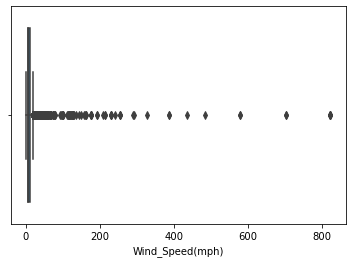

In [65]:
sns.boxplot(df['Wind_Speed(mph)'])

In [66]:
#sns.pairplot(df[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']])

In [67]:
df[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Temperature(F),1.000000,0.827172,-0.305190,-0.050452,0.170987,-0.005836
Wind_Chill(F),0.827172,1.000000,-0.125962,-0.114854,0.113141,-0.104785
Humidity(%),-0.305190,-0.125962,1.000000,0.082322,-0.389654,-0.158570
Pressure(in),-0.050452,-0.114854,0.082322,1.000000,-0.010248,-0.015177
Visibility(mi),0.170987,0.113141,-0.389654,-0.010248,1.000000,0.020640
Wind_Speed(mph),-0.005836,-0.104785,-0.158570,-0.015177,0.020640,1.000000


In [68]:
df.Severity.value_counts()

2    1601256
3     815920
4       6613
1       1041
Name: Severity, dtype: int64

In [206]:
df[['Weather_Condition']]

,Weather_Condition
0,Light Rain
1,Light Rain
2,Overcast
3,Mostly Cloudy
4,Mostly Cloudy
...,...
2478813,Fair
2478814,Clear
2478815,Haze
2478816,Clear


In [205]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [214]:
df['Weather_Condition'].str.strip().unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [71]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Side', 'State', 'Zipcode', 'Country', 'Timezone',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'day_of_week', 'weekend', 'Time', 'accident_time', 'month', 'year',
       'day'],
      dtype='object')

<AxesSubplot:xlabel='Humidity(%)'>

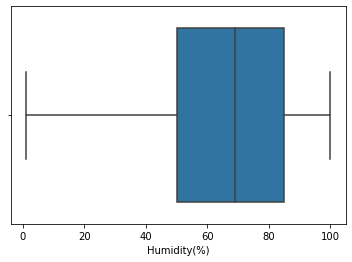

In [61]:
sns.boxplot(data=df1,x='Humidity(%)')

<AxesSubplot:>

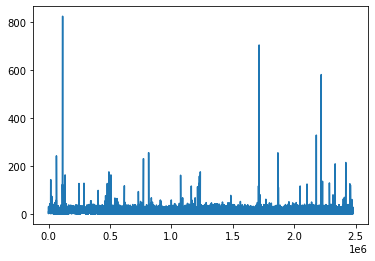

In [306]:
df1['Wind_Speed(mph)'].plot()

In [307]:
df1.columns

Index(['TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'weekend'],
      dtype='object')

In [308]:
scale.inverse_transform(df02)[:,2].max()

115.0

<AxesSubplot:>

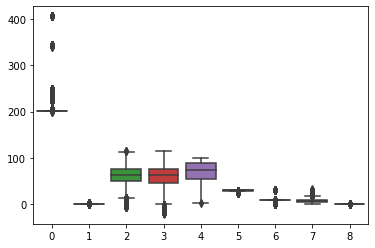

In [345]:
sns.boxplot(data=scale.inverse_transform(df02)[:])

<AxesSubplot:>

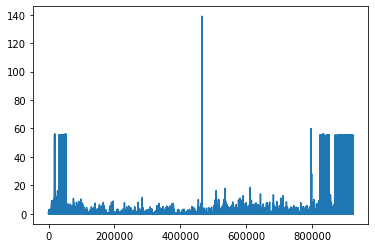

In [236]:
pd.DataFrame(df01).iloc[:,8].plot()

In [73]:
def outlier(x):
    q3 = x.quantile(0.75)
    q1 = x.quantile(0.25)
    upper_limit = q3 + 1.5*(q3-q1)
    lower_limit = q1 - 1.5*(q3-q1)
    return lower_limit,upper_limit

In [74]:
min_temp,max_temp = outlier(df[['Temperature(F)']])

In [75]:
min_chill, max_chill = outlier(df[['Wind_Chill(F)']])

In [76]:
min_speed, max_speed = outlier(df[['Wind_Speed(mph)']])

In [77]:
min_pressure, max_pressure = outlier(df[['Pressure(in)']])

In [85]:
df1 = df[(df['Temperature(F)']<max_temp[0]) & (df['Temperature(F)']>min_temp[0])]

In [86]:
df2 = df1[(df['Wind_Chill(F)']<max_chill[0]) & (df['Wind_Chill(F)']>min_chill[0])]

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_4015/987586870.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[(df['Wind_Chill(F)']<max_chill[0]) & (df['Wind_Chill(F)']>min_chill[0])]


In [87]:
df3 = df2[(df['Wind_Speed(mph)']<max_speed[0]) & (df['Wind_Speed(mph)']>min_speed[0])]

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_4015/1469021945.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df['Wind_Speed(mph)']<max_speed[0]) & (df['Wind_Speed(mph)']>min_speed[0])]


In [88]:
df4 = df3[(df['Pressure(in)']<max_pressure[0]) & (df['Pressure(in)']>min_pressure[0])]

/var/folders/tp/r9md9jss78nf28s4cq7vcg580000gn/T/ipykernel_4015/3052182091.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[(df['Pressure(in)']<max_pressure[0]) & (df['Pressure(in)']>min_pressure[0])]


<AxesSubplot:xlabel='Wind_Speed(mph)'>

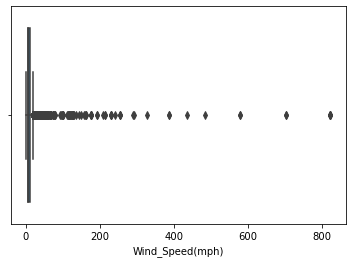

In [222]:
sns.boxplot(data=df1,x='Wind_Speed(mph)')

In [90]:
df4.reset_index(drop=True,inplace=True)

In [91]:
import re

In [110]:
def clean(x):
    if ('cloudy' or 'cloudy' or 'clouds' or 'cloud') in x:
        return 'Cloudy'
    elif ('rains') in x:
        return 'Rain'
    elif 'snow' in x:
        return 'Snow'
    elif ('partial fog') in x:
        return 'Fog'
    else:
        return x

In [111]:
df4['Weather_Condition'].map(lambda x: clean(x.lower()))

0            overcast
1              Cloudy
2              Cloudy
3          light rain
4            overcast
              ...    
2056236         clear
2056237         clear
2056238          haze
2056239         clear
2056240         clear
Name: Weather_Condition, Length: 2056241, dtype: object

In [112]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [113]:
df4['Weather_Condition'].unique().shape

(78,)

In [114]:
from sklearn.cluster import DBSCAN

In [115]:
DBSCAN

sklearn.cluster._dbscan.DBSCAN

In [315]:
df03 = scale.inverse_transform(df02)

<AxesSubplot:>

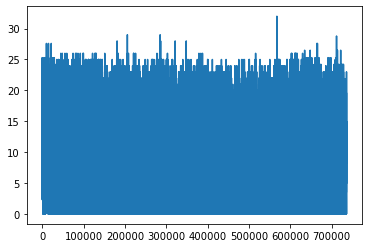

In [341]:
pd.DataFrame(df03).iloc[:,7].plot()

In [339]:
pd.DataFrame(df03).iloc[:,7].mean()

7.17061591450493

In [343]:
df1['Wind_Speed(mph)'][:735726].mean()

8.154006389245813